In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Importing the dataset
dataset = pd.read_csv('bengaluru_house_prices.csv')
dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
dataset.shape

(13320, 9)

In [3]:
df2 = dataset.drop(['area_type', 'society', 'balcony', 'availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2.shape

(13320, 5)

In [6]:

df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3.shape

(13246, 5)

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-9-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk > 20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2100-2850')

2475.0

In [18]:
convert_sqft_to_num('232.2 Meter')

In [19]:
df4 = df3.copy()
#converting ranges in total_sqft to average value
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
#removing nulls
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df4.shape

(13200, 6)

In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df5 = df4.copy()
#creating a price per sqft column
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
(df5.location.unique())


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
#grouping by locations to check their frequencies
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [25]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [26]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [27]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
df5.shape

(13200, 7)

In [30]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [31]:
df6.price_per_sqft.describe() 

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [33]:
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [34]:
df7.price_per_sqft.describe() 

count    10242.000000
mean      5657.735993
std       2266.368844
min       1250.000000
25%       4244.796706
50%       5172.846776
75%       6426.000592
max      24509.803922
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

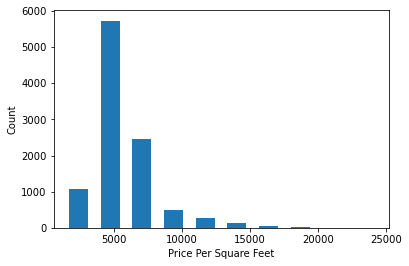

In [35]:
import matplotlib
from matplotlib import pyplot as plt
# matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


Text(0, 0.5, 'PRICE IN LAKHS')

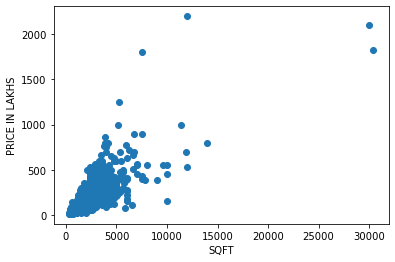

In [36]:
plt.scatter(df7.total_sqft,df7.price)
plt.xlabel("SQFT")
plt.ylabel("PRICE IN LAKHS")

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (6,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    


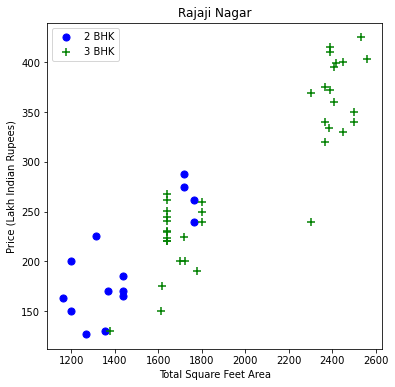

In [38]:
plot_scatter_chart(df7,"Rajaji Nagar")


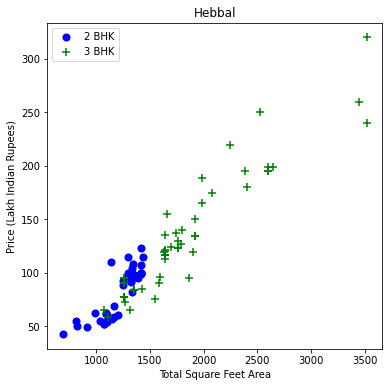

In [39]:
plot_scatter_chart(df7,"Hebbal")

<BarContainer object of 10242 artists>

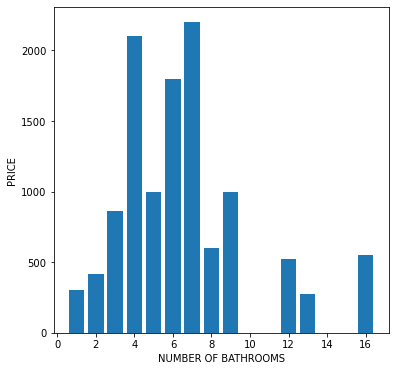

In [40]:

plt.figure(figsize=(6,6))
plt.ylabel("PRICE")
plt.xlabel("NUMBER OF BATHROOMS")
plt.bar(df7.bath,df7.price)


In [41]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(10148, 7)

In [42]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [43]:
df9.location

0        1st Block Jayanagar
1        1st Block Jayanagar
2        1st Block Jayanagar
3        1st Block Jayanagar
4        1st Block Jayanagar
                ...         
10237                  other
10238                  other
10239                  other
10240                  other
10241                  other
Name: location, Length: 10148, dtype: object

# MODELLING

In [44]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df10 = pd.concat([df9, dummies.drop('other', axis='columns')], axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11 = df10.drop('location', axis = 'columns')
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1353.0,2.0,110.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'BHK')

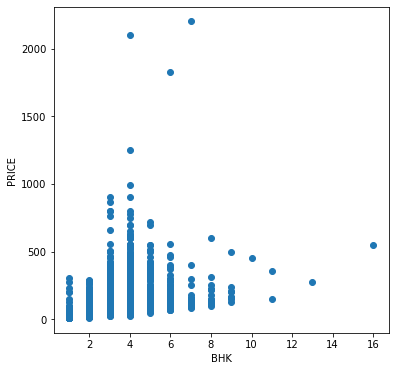

In [47]:
plt.figure(figsize=(6, 6))
plt.scatter(df10.bhk,df10.price)
plt.ylabel("PRICE")
plt.xlabel("BHK")

In [48]:
X = df11.drop('price', axis = 'columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Y = df11.iloc[:,2].values
Y

array([428.  , 194.  , 235.  , ...,  63.93,  48.  , 400.  ])

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [51]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Multiple Regression

In [52]:
mlr = LinearRegression()
from sklearn.metrics import explained_variance_score
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [53]:
mlr_score

0.8000955690718926

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.6474265652147686

# Random Forest

In [55]:
reg=RandomForestRegressor(n_estimators = 50,random_state=20)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)


0.7543049623317964

# Lasso Regression

In [56]:
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)


0.7998412076871193

# SVM

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X,Y, test_size = 0.2, random_state = 99)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# sc.fit(X_train)
# X_train = sc.transform(X_train)

X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)

In [58]:
from sklearn.svm import SVR
model_svr_default = SVR() # Using the default setting such as kernel as 'rbf'
model_svr_default.fit(X_train, y_train)

model_svr_default.score(X_valid, y_valid)


0.23069789935178342

In [59]:
model_svr_lr = SVR(kernel = 'linear') 
model_svr_lr.fit(X_train, y_train)

model_svr_lr.score(X_valid, y_valid)


0.7662431759057156

In [60]:
y_pred=lasso_reg.predict(X_test)

In [61]:
y_pred.shape

(2030,)

In [62]:
for i in range(len(y_test)):
    print("Actual Price:",y_test[i],"Predicted Price:",y_pred[i])

Actual Price: 66.02 Predicted Price: 55.33994973180407
Actual Price: 96.17 Predicted Price: 72.70869872405329
Actual Price: 215.0 Predicted Price: 173.24225628208603
Actual Price: 78.0 Predicted Price: 65.2955823156268
Actual Price: 73.9 Predicted Price: 101.26977386230998
Actual Price: 70.0 Predicted Price: 48.583205758669536
Actual Price: 65.0 Predicted Price: 55.27704125122165
Actual Price: 43.0 Predicted Price: 60.96164012953169
Actual Price: 290.0 Predicted Price: 178.38386011842982
Actual Price: 80.0 Predicted Price: 81.00429058832516
Actual Price: 400.0 Predicted Price: 256.05722077795883
Actual Price: 225.0 Predicted Price: 159.9139860149033
Actual Price: 39.0 Predicted Price: 62.61579260016086
Actual Price: 46.5 Predicted Price: 46.73040453431962
Actual Price: 128.0 Predicted Price: 185.6702693324413
Actual Price: 45.0 Predicted Price: 41.35911123244581
Actual Price: 103.0 Predicted Price: 103.39627507098604
Actual Price: 69.61 Predicted Price: 77.56433009220204
Actual Price: 

Actual Price: 60.0 Predicted Price: 72.41458324884225
Actual Price: 85.0 Predicted Price: 129.25498541422894
Actual Price: 130.0 Predicted Price: 74.21219574293875
Actual Price: 60.0 Predicted Price: 48.417525189785366
Actual Price: 42.72 Predicted Price: 50.5829683143793
Actual Price: 65.0 Predicted Price: 65.84933830878938
Actual Price: 64.0 Predicted Price: 63.109066964402416
Actual Price: 46.0 Predicted Price: 40.170869544589216
Actual Price: 98.0 Predicted Price: 98.69286166046508
Actual Price: 54.51 Predicted Price: 77.4839462366264
Actual Price: 42.0 Predicted Price: 50.93455303305181
Actual Price: 52.0 Predicted Price: 58.95737508365234
Actual Price: 40.2 Predicted Price: 36.707744308459354
Actual Price: 78.0 Predicted Price: 72.65450374618013
Actual Price: 40.0 Predicted Price: 21.545508804808065
Actual Price: 42.0 Predicted Price: 34.47670916612601
Actual Price: 48.0 Predicted Price: 38.94973610575302
Actual Price: 160.0 Predicted Price: 113.9610550723079
Actual Price: 40.0 P

Actual Price: 115.0 Predicted Price: 96.95441379819958
Actual Price: 58.0 Predicted Price: 71.05855882479838
Actual Price: 70.0 Predicted Price: 52.01402831757031
Actual Price: 130.0 Predicted Price: 183.78231457115368
Actual Price: 110.0 Predicted Price: 106.2047780221827
Actual Price: 48.76 Predicted Price: 56.245092990044355
Actual Price: 50.0 Predicted Price: 56.130111383632084
Actual Price: 38.0 Predicted Price: 63.109066964402416
Actual Price: 78.29 Predicted Price: 80.16785919700483
Actual Price: 36.0 Predicted Price: 76.23115431616394
Actual Price: 16.5 Predicted Price: 10.183496624499181
Actual Price: 33.7 Predicted Price: 11.916559963900337
Actual Price: 62.0 Predicted Price: 35.48447685152134
Actual Price: 63.0 Predicted Price: 69.11140359021735
Actual Price: 65.0 Predicted Price: 67.28552418106835
Actual Price: 54.0 Predicted Price: 59.867001085901634
Actual Price: 210.0 Predicted Price: 172.26321556910625
Actual Price: 44.0 Predicted Price: 48.44792350870409
Actual Price: 

Actual Price: 275.0 Predicted Price: 401.77568937776755
Actual Price: 75.0 Predicted Price: 79.08341149823595
Actual Price: 50.0 Predicted Price: 39.052803606628586
Actual Price: 50.0 Predicted Price: 40.522618533695145
Actual Price: 26.91 Predicted Price: 16.757597257202463
Actual Price: 52.5 Predicted Price: 59.522877820125075
Actual Price: 72.0 Predicted Price: 66.25216625599079
Actual Price: 150.0 Predicted Price: 230.9975321683741
Actual Price: 44.0 Predicted Price: 54.752550909561606
Actual Price: 68.0 Predicted Price: 85.6217601232085
Actual Price: 84.0 Predicted Price: 114.73563864815664
Actual Price: 56.0 Predicted Price: 71.13927765651646
Actual Price: 50.0 Predicted Price: 56.63592635659748
Actual Price: 130.0 Predicted Price: 142.7964084914529
Actual Price: 22.14 Predicted Price: 10.778350280830644
Actual Price: 83.0 Predicted Price: 93.40567397235961
Actual Price: 52.0 Predicted Price: 79.23623111019349
Actual Price: 25.4 Predicted Price: 25.967777320331436
Actual Price: 8

Actual Price: 100.0 Predicted Price: 128.9120800134757
Actual Price: 36.25 Predicted Price: 14.691366527416363
Actual Price: 56.0 Predicted Price: 84.9278670330318
Actual Price: 65.0 Predicted Price: 51.73798015480388
Actual Price: 85.0 Predicted Price: 77.8506536701848
Actual Price: 65.0 Predicted Price: 43.11713850604797
Actual Price: 89.61 Predicted Price: 88.677171593524
Actual Price: 52.71 Predicted Price: 58.149059618005055
Actual Price: 28.57 Predicted Price: 19.656623484277958
Actual Price: 52.0 Predicted Price: 51.350601091225755
Actual Price: 286.0 Predicted Price: 213.9232961655984
Actual Price: 101.0 Predicted Price: 99.7936191010038
Actual Price: 38.46 Predicted Price: 32.656491402055174
Actual Price: 60.0 Predicted Price: 70.42668057844047
Actual Price: 40.7 Predicted Price: 46.19500521030518
Actual Price: 142.0 Predicted Price: 127.78179132672453
Actual Price: 60.0 Predicted Price: 56.48928126512833
Actual Price: 44.0 Predicted Price: 49.68704153638376
Actual Price: 32.0

Actual Price: 57.0 Predicted Price: 68.26289136809217
Actual Price: 70.0 Predicted Price: 71.16940840647122
Actual Price: 48.1 Predicted Price: 61.44173573788737
Actual Price: 52.0 Predicted Price: 106.42359826599973
Actual Price: 52.5 Predicted Price: 49.18559738727309
Actual Price: 140.0 Predicted Price: 137.65901451704372
Actual Price: 125.0 Predicted Price: 165.1397620211451
Actual Price: 94.0 Predicted Price: 69.862986174004
Actual Price: 17.0 Predicted Price: -1.2146339170024696
Actual Price: 60.0 Predicted Price: 164.66325651300264
Actual Price: 135.0 Predicted Price: 136.45221171441722
Actual Price: 50.0 Predicted Price: 38.473815152915655
Actual Price: 115.0 Predicted Price: 150.1286134742819
Actual Price: 96.8 Predicted Price: 97.94625667981566
Actual Price: 61.0 Predicted Price: 66.62159117158369
Actual Price: 105.0 Predicted Price: 112.93010393299319
Actual Price: 140.0 Predicted Price: 162.4673610957958
Actual Price: 120.0 Predicted Price: 111.21951819721103
Actual Price: 

Actual Price: 75.0 Predicted Price: 78.21386543858738
Actual Price: 90.0 Predicted Price: 78.44609372426685
Actual Price: 65.0 Predicted Price: 63.3594125198545
Actual Price: 68.0 Predicted Price: 92.1074193668615
Actual Price: 68.0 Predicted Price: 92.1074193668615
Actual Price: 55.0 Predicted Price: 41.27689414321666
Actual Price: 135.0 Predicted Price: 108.57102510087044
Actual Price: 55.47 Predicted Price: 52.565704820421686
Actual Price: 73.0 Predicted Price: 88.39300475031385
Actual Price: 62.0 Predicted Price: 38.62810281240013
Actual Price: 67.0 Predicted Price: 65.53655811496843
Actual Price: 30.0 Predicted Price: 10.102507602133436
Actual Price: 85.0 Predicted Price: 75.5970512959069
Actual Price: 200.0 Predicted Price: 155.08523377051324
Actual Price: 75.0 Predicted Price: 43.41623084638314
Actual Price: 62.0 Predicted Price: 63.287831625358805
Actual Price: 46.0 Predicted Price: 54.242061686719694
Actual Price: 47.59 Predicted Price: 54.59254941454125
Actual Price: 160.0 Pr

In [63]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# scre=r2_score(y_test, y_pred)*100
# print("Accuracy of Random Forest:",round(scre),"%")

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))

mse,rms

(1106.500078782072, 33.2640959411506)

In [65]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return dt_reg.predict([x])[0]


In [66]:
arr1=[None] * len(y_test);    
for i in range(300, len(y_test)):    
    arr1[i] = y_test[i]
    if i==600:
        break
arr2=[None]*len(y_pred)
for i in range(300,len(y_pred)):
    arr2[i]=y_pred[i]
    if i==600:
        break;


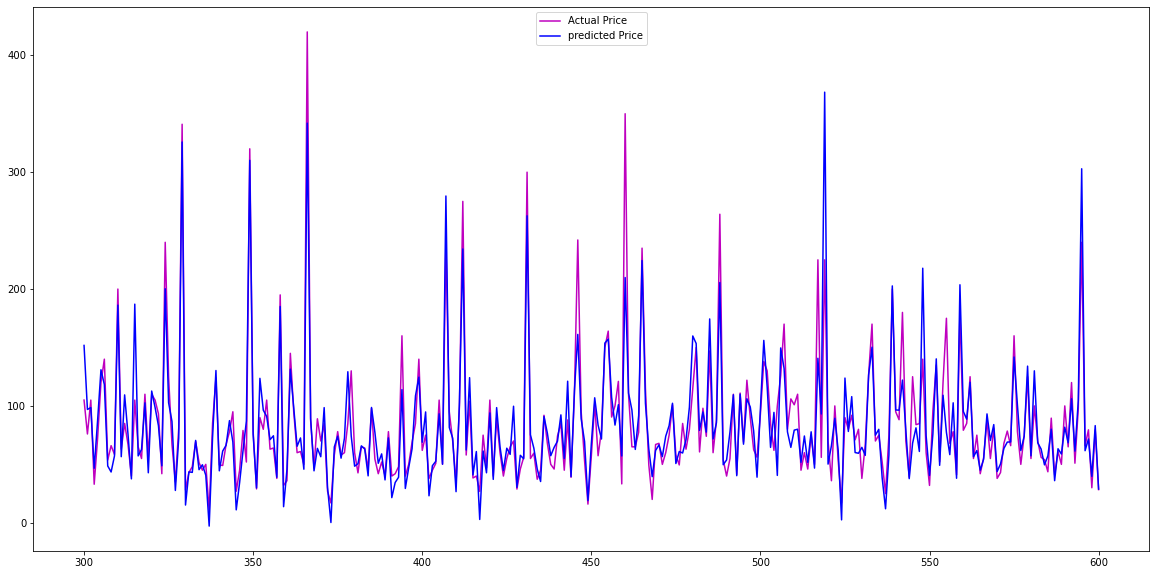

In [67]:
plt.figure(figsize=(20,10))
plt.plot(arr1, color="m")
plt.plot(arr2, color="b")
plt.legend(['Actual Price','predicted Price'],loc='upper center')


In [68]:
predict_price('1st Phase JP Nagar',812,1,1)


26.0

In [69]:
predict_price('Indira Nagar',1000,2,3)


87.5

In [70]:
predict_price('Electronic City Phase II',1056,2,2)


39.07